In [2]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tkinter 
from tkinter import *

# GUI

C:\Users\NitishTalekar\Applictions\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
C:\Users\NitishTalekar\Applictions\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
C:\Users\NitishTalekar\Applictions\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
C:\Users\NitishTalekar\Applictions\Anaconda3\lib\site-packages\ipykernel_launcher.py:153: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\NitishTalekar\Applictions\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3063, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 140, in pandas._libs.index.IndexEngine.get_loc
  File "p

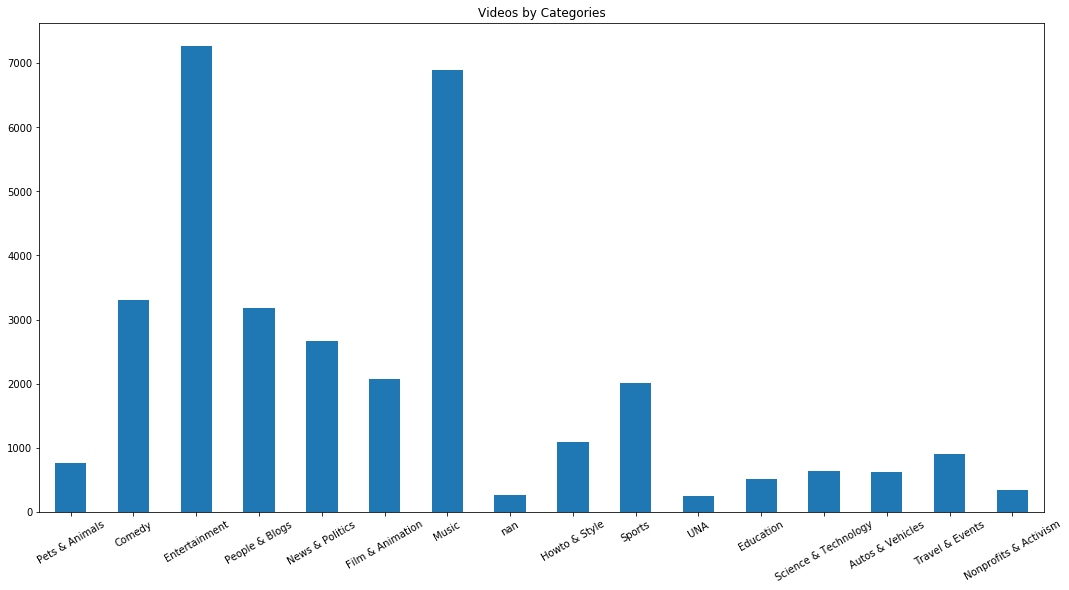

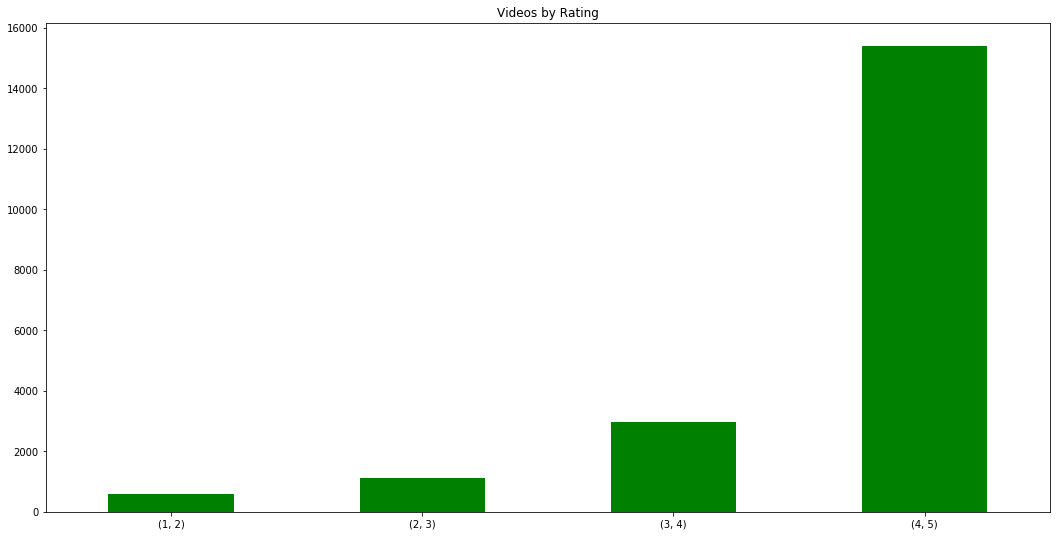

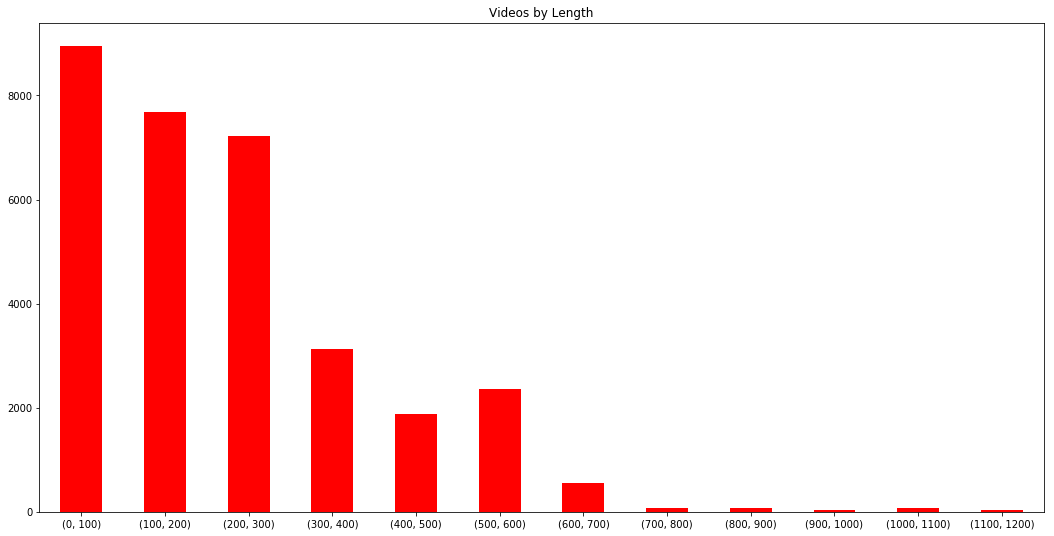

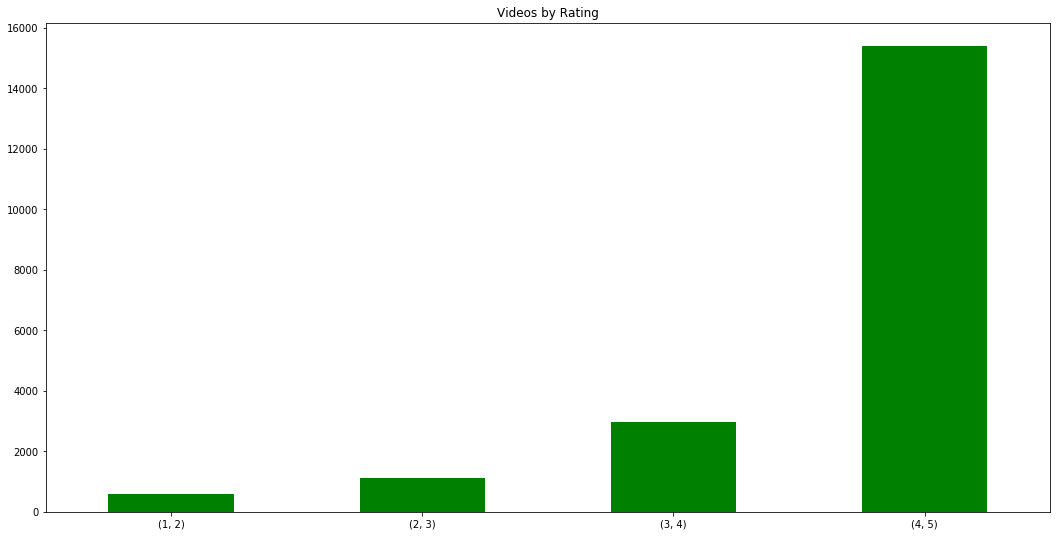

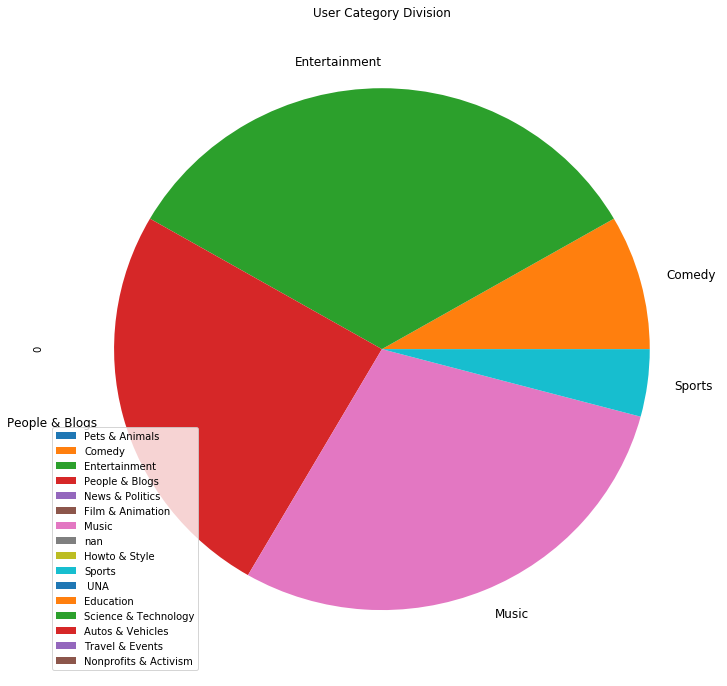

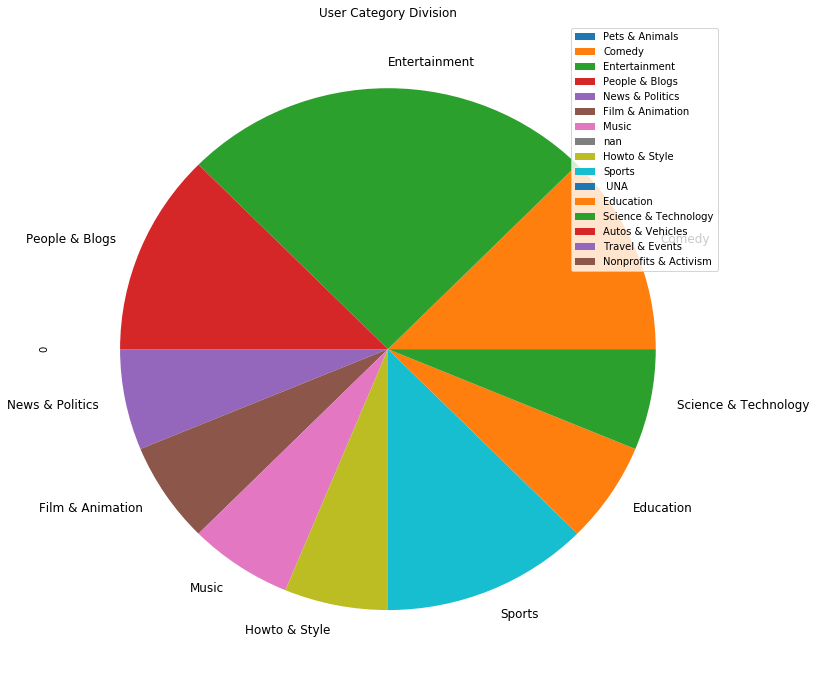

In [3]:
tk=tkinter.Tk()
tk.title("Big Data Analysis")
tk.geometry('500x300+80+80')

client = MongoClient()
db = client.ytdb
yt = db.ytdata
cursor = yt.find()
dat = [i for i in cursor]


def catg():
    c = yt.distinct('Category')
    cat = [i for i in c]
    cat_count = {}
    for i in cat:
        x = yt.find({'Category':i}).count()
        cat_count[i] = x
    catgraph = pd.DataFrame.from_dict(cat_count,orient='index')
    catgraph.plot.bar(figsize=(18,9),legend=False,title="Videos by Categories",rot=30)
    path = 'media/Category.jpg'
    plt.savefig(path)
    img = cv2.imread('media/Category.jpg')
    imS = cv2.resize(img, (1000, 500))
    cv2.imshow("Category",imS)
    
def ratg():
    rat = [1,2,3,4]
    rat_count = {}
    for i in rat:
        x = yt.find({'Rating':{"$gt":i, "$lt" :i+1}}).count()
        rat_count[(i,i+1)] = x
    ratgraph = pd.DataFrame.from_dict(rat_count,orient='index')
    ratgraph.plot.bar(figsize=(18,9),legend=False,title="Videos by Rating",rot=0,color='green')
    path = 'media/Rating.jpg'
    plt.savefig(path)
    img = cv2.imread('media/Rating.jpg')
    imS = cv2.resize(img, (1000, 500))
    cv2.imshow("Rating",imS)

def comg():
    com = [i for i in range(0,42,3)]
    com_count = {}
    for i in com:
        x = yt.find({'Comments':{"$gt":i, "$lt" :i+3}}).count()
        com_count[(i,i+3)] = x
    comgraph = pd.DataFrame.from_dict(com_count,orient='index')
    comgraph.plot.bar(figsize=(18,9),legend=False,title="Videos by Comment",rot=0,color='lightskyblue')
    path = 'media/Comments.jpg'
    plt.savefig(path)
    img = cv2.imread('media/Comments.jpg')
    imS = cv2.resize(img, (1000, 500))
    cv2.imshow("Comments",imS)
    
def lengg():
    leng = [i*100 for i in range(12)]
    leng_count = {}
    for i in leng:
        x = yt.find({'Length':{"$gt":i, "$lt" :i+100}}).count()
        leng_count[(i,i+100)] = x
    lenggraph = pd.DataFrame.from_dict(leng_count,orient='index')
    lenggraph.plot.bar(figsize=(18,9),legend=False,title="Videos by Length",rot=0,color='red')
    path = 'media/Length.jpg'
    plt.savefig(path)
    img = cv2.imread('media/Length.jpg')
    imS = cv2.resize(img, (1000, 500))
    cv2.imshow("Length",imS)

def top5():
    x = yt.find({},{'Uploader','Rating','Category','Views'},sort = [('Rating',pymongo.DESCENDING),('Views',pymongo.DESCENDING)])
    x1 = [i for i in x[0:5]]
    
    upl = [x1[i]['Uploader'] for i in range(5)]
    
    tk2=tkinter.Tk()
    tk2.title("Top 5 Youtubers")
    tk2.geometry('600x350+80+80')
    
    title2 = Label(tk2, text="TOP 5 Youtubers Data",font=5)
    title2.pack()
    
    upld = Label(tk2, text="YOUTUBER",font=4)
    upld.place(x =80,y=50)
    
    ratl = Label(tk2, text="AVG RATING",font=4)
    ratl.place(x =250,y=50)
    
    vil = Label(tk2, text="TOTAL VIEWS",font=4)
    vil.place(x =410,y=50)
    
    up_rat = {}
    up_view = {}
    lb_up = []
    lb_rat = []
    lb_vi = []
    lb_sr = []
    j = 0
    
    for i in upl:
        rat = pd.DataFrame(list(yt.find({'Uploader':i},{'Rating'})))
        rat.dropna(axis=0)
        up_rat[i] = [rat['Rating'].mean()]
        vi = pd.DataFrame(list(yt.find({'Uploader':i},{'Views'})))
        vi.dropna(axis=0)
        up_view[i] = [vi['Views'].sum()]
        lb_sr.append(Label(tk2, text=str(j+1)))
        lb_sr[j].place(x=70,y=100+(j*30))
        lb_up.append(Label(tk2, text=str(i)))
        lb_up[j].place(x=100,y=100+(j*30))
        lb_rat.append(Label(tk2, text=str(up_rat[i])))
        lb_rat[j].place(x=270,y=100+(j*30))
        lb_vi.append(Label(tk2, text=str(up_view[i])))
        lb_vi[j].place(x=440,y=100+(j*30))
        j=j+1
        
    def ratings():
        urat_graph = pd.DataFrame.from_dict(up_rat,orient='index')
        urat_graph.plot.barh(figsize=(15,10),legend=False,title='UPLOADER RATINGS',fontsize=13,color='salmon')
        path = 'media/Ratings.jpg'
        plt.savefig(path)
        img = cv2.imread('media/Ratings.jpg')
        imS = cv2.resize(img, (1000, 500))
        cv2.imshow("Rating",imS)
        
    def viewings():
        uvi_graph = pd.DataFrame.from_dict(up_view,orient='index')
        uvi_graph.plot.barh(figsize=(15,10),legend=False,title='UPLOADER VIEWINGS',fontsize=13,color='seagreen')
        path = 'media/Views.jpg'
        plt.savefig(path)
        img = cv2.imread('media/Views.jpg')
        imS = cv2.resize(img, (1000, 500))
        cv2.imshow("Views",imS)
        
    rtbtn = Button(tk2, text="Rating Comparison", command=ratings)
    rtbtn.place(x=125,y=300)
    vibtn = Button(tk2, text="Views Comparison", command=viewings)
    vibtn.place(x=325,y=300)
    tk2.mainloop()
    
def rank1():
    rk = int(rankval.get())
    x = yt.find({},{'Uploader'},sort = [('Rating',pymongo.DESCENDING),('Views',pymongo.DESCENDING)])
    x1 = [i for i in x[rk-1:rk]]
    rk_name = x1[0]['Uploader']
    urank.config(text=rk_name)

def profile():
    u_name = val.get()
    c = yt.distinct('Category')
    cat = [i for i in c]
    u_count = {}
    for i in cat:
        x = yt.find({'Uploader':u_name,'Category':i}).count()
        u_count[i] = x
    
    tk3=tkinter.Tk()
    tk3.title(str(u_name) + "'s Profile")
    tk3.geometry('250x350+80+80')
    
    urating = round(pd.DataFrame(list(yt.find({'Uploader':u_name},{'Rating'})))['Rating'].mean(),2)
    uview = round(pd.DataFrame(list(yt.find({'Uploader':u_name},{'Views'})))['Views'].sum(),2)
    
    def user_cat():
        u_graph = pd.DataFrame.from_dict(u_count,orient='index')
        u_graph.plot.pie(y=0,figsize=(12,12),fontsize=12,title='User Category Division')
        path = 'media/UCat.jpg'
        plt.savefig(path)
        img = cv2.imread('media/UCat.jpg')
        imS = cv2.resize(img, (500, 500))
        cv2.imshow("UCat",imS)
    
    utitle = Label(tk3, text=str(u_name) + "'s Profile",font=6)
    utitle.pack() 
    
    ub = Label(tk3, text="",font=2)
    ub.pack() 
    
    ur = Label(tk3, text="AVERAGE RATING",font=5)
    ur.pack() 
    ur2 = Label(tk3, text=str(urating),font=5)
    ur2.pack()
    
    ub2 = Label(tk3, text="",font=2)
    ub2.pack() 
    
    uv = Label(tk3, text="TOTAL VIEWS",font=5)
    uv.pack() 
    uv2 = Label(tk3, text=str(uview),font=5)
    uv2.pack() 
    
    ub3 = Label(tk3, text="",font=2)
    ub3.pack() 
    
    ucat = Button(tk3, text="Category Wise", command=user_cat)
    ucat.pack()
    
    tk3.mainloop()



title = Label(tk, text="YOUTUBE DATA ANALYSIS",font=5)
title.pack()

catbtn = Button(tk, text="By Category", command=catg)
catbtn.place(x=45,y=45)

ratbtn = Button(tk, text="By Rating", command=ratg)
ratbtn.place(x=155,y=45)

combtn = Button(tk, text="By Comments", command=comg)
combtn.place(x=255,y=45)

lengbtn = Button(tk, text="By Length", command=lengg)
lengbtn.place(x=375,y=45)

top5btn = Button(tk, text="TOP 5 Trending", command=top5)
top5btn.place(x=205,y=85)

user = Label(tk, text="ENTER USERNAME FOR ANALYSIS")
user.place(x=160,y=125)

val = StringVar()
text = Entry(tk,text=val)
text.place(x=190,y=155)

prbtn = Button(tk, text="PROFILE", command=profile)
prbtn.place(x=220,y=180)

rank = Label(tk, text="ENTER A RANK")
rank.place(x=40,y=230)

rankval = StringVar()
text1 = Entry(tk,text=rankval)
text1.place(x=150,y=230)

rbtn = Button(tk, text="SEARCH",command=rank1)
rbtn.place(x=290,y=230)

urank = Label(tk, text="")
urank.place(x=360,y=230)

tk.mainloop()

In [4]:
dat

[{'_id': ObjectId('5da2be3b1dc1408ebbe6f8aa'),
  'ID': 'QuRYeRnAuXM',
  'Uploader': 'EvilSquirrelPictures',
  'Interval': 1135.0,
  'Category': 'Pets & Animals',
  'Length': 252.0,
  'Views': 1075.0,
  'Rating': 4.96,
  'Num_Rating': 46.0,
  'Comments': 86.0,
  'RelativeID': 'gFa1YMEJFag'},
 {'_id': ObjectId('5da2be3b1dc1408ebbe6f8ab'),
  'ID': '3TYqkBJ9YRk',
  'Uploader': 'hggh22',
  'Interval': 1135.0,
  'Category': 'Comedy',
  'Length': 169.0,
  'Views': 228.0,
  'Rating': 5.0,
  'Num_Rating': 5.0,
  'Comments': 3.0,
  'RelativeID': 'QuRYeRnAuXM'},
 {'_id': ObjectId('5da2be3b1dc1408ebbe6f8ac'),
  'ID': 'rSJ8QZWBegU',
  'Uploader': 'TimeGem',
  'Interval': 1135.0,
  'Category': 'Entertainment',
  'Length': 95.0,
  'Views': 356.0,
  'Rating': 4.31,
  'Num_Rating': 13.0,
  'Comments': 1.0,
  'RelativeID': 'QuRYeRnAuXM'},
 {'_id': ObjectId('5da2be3b1dc1408ebbe6f8ad'),
  'ID': 'nRcovJn9xHg',
  'Uploader': 'wooochacha',
  'Interval': 1135.0,
  'Category': 'Entertainment',
  'Length': 118.

In [5]:
x = yt.find({},{'Uploader','Rating','Category','Views'},sort = [('Rating',pymongo.DESCENDING),('Views',pymongo.DESCENDING)])
x1 = [i for i in x[0:5]]
x1[0]['Uploader']

'd00d123'

In [6]:
len(dat)

32800